# Assignment 1 - Oil Painting Filter

## Task 1 - Combining Colour Bands

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

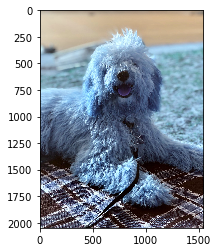

In [3]:
dog_img = cv2.imread("img/dog.jpg")
plt.imshow(dog_img)

Images are by default BGR.

We want 0.114 B, 0.587 G and 0.299 R.

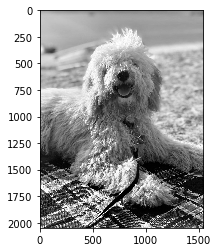

In [5]:
dog_img_gray = dog_img[:,:,0] * 0.114 + dog_img[:,:,1] * 0.587 + dog_img[:,:,2]
plt.imshow(dog_img_gray, cmap='gray')

## Task 2

In [26]:
filtered_dog = np.copy(dog_img_gray)
t = np.arange(25)
t = np.reshape(t, (5,5))
print(t)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
